In [13]:
#Import packages
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from dmba import classificationSummary

In [14]:
#Import data
flight_data=pd.read_csv('FlightDelays.csv')

In [15]:
#Check data
flight_data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [16]:
#Check data types of columns 
print(flight_data.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
Flight Status    object
dtype: object


In [17]:
flight_data['FL_DATE'] = pd.to_datetime(flight_data['FL_DATE'], format='%m/%d/%Y')

In [18]:
flight_data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,2004-01-31,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,2004-01-31,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,2004-01-31,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,2004-01-31,2216,DCA,0,6,31,N16961,ontime


In [19]:
#make new Month column extracted from FL_DATE. take only month bc its more relevant to the data. 
flight_data['Month'] = flight_data['FL_DATE'].dt.month

In [20]:
flight_data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Month
0,1455,OH,1455,JFK,184,2004-01-01,5935,BWI,0,4,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime,1
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime,1
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,2004-01-31,2761,DCA,0,6,31,N15555,ontime,1
2197,1700,RU,1653,EWR,213,2004-01-31,2497,IAD,0,6,31,N16976,ontime,1
2198,1600,RU,1558,EWR,199,2004-01-31,2361,DCA,0,6,31,N14902,ontime,1
2199,1359,RU,1403,EWR,199,2004-01-31,2216,DCA,0,6,31,N16961,ontime,1


In [22]:
flight_data = flight_data.drop(columns=['FL_DATE'])

In [23]:
flight_data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Month
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,N940CA,ontime,1
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,N405FJ,ontime,1
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,N695BR,ontime,1
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,N662BR,ontime,1
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,N698BR,ontime,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,2761,DCA,0,6,31,N15555,ontime,1
2197,1700,RU,1653,EWR,213,2497,IAD,0,6,31,N16976,ontime,1
2198,1600,RU,1558,EWR,199,2361,DCA,0,6,31,N14902,ontime,1
2199,1359,RU,1403,EWR,199,2216,DCA,0,6,31,N16961,ontime,1


In [24]:
#Bin scheduled departure time into eight bins
flight_data['CRS_DEP_TIME_BINNED'] = pd.cut(flight_data['CRS_DEP_TIME'], bins=8, labels=False)

In [25]:
flight_data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,Month,CRS_DEP_TIME_BINNED
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,N940CA,ontime,1,4
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,N405FJ,ontime,1,5
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,N695BR,ontime,1,3
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,N662BR,ontime,1,5
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,N698BR,ontime,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,2761,DCA,0,6,31,N15555,ontime,1,0
2197,1700,RU,1653,EWR,213,2497,IAD,0,6,31,N16976,ontime,1,5
2198,1600,RU,1558,EWR,199,2361,DCA,0,6,31,N14902,ontime,1,5
2199,1359,RU,1403,EWR,199,2216,DCA,0,6,31,N16961,ontime,1,3


In [26]:
# Drop irrelevant columns. Drop month bc there's only 1 month (January). Drop TAIL_NUM because it has too many unique variables.

flight_data = flight_data.drop(columns=['DAY_OF_MONTH', 'DEP_TIME', 'TAIL_NUM', 'Month'])

In [27]:
flight_data

,CRS_DEP_TIME,CARRIER,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,Flight Status,CRS_DEP_TIME_BINNED
0,1455,OH,JFK,184,5935,BWI,0,4,ontime,4
1,1640,DH,JFK,213,6155,DCA,0,4,ontime,5
2,1245,DH,LGA,229,7208,IAD,0,4,ontime,3
3,1715,DH,LGA,229,7215,IAD,0,4,ontime,5
4,1039,DH,LGA,229,7792,IAD,0,4,ontime,2
...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,EWR,199,2761,DCA,0,6,ontime,0
2197,1700,RU,EWR,213,2497,IAD,0,6,ontime,5
2198,1600,RU,EWR,199,2361,DCA,0,6,ontime,5
2199,1359,RU,EWR,199,2216,DCA,0,6,ontime,3


In [28]:
#Make dummy variables for the Duration Column. Transform predictors with more than two categories. 
X= pd.get_dummies(flight_data, columns=['DAY_WEEK', 'CARRIER', 'DEST', 'ORIGIN'], drop_first=True)

In [29]:
X

,CRS_DEP_TIME,DISTANCE,FL_NUM,Weather,Flight Status,CRS_DEP_TIME_BINNED,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,...,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD
0,1455,184,5935,0,ontime,4,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1,1640,213,6155,0,ontime,5,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,1245,229,7208,0,ontime,3,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
3,1715,229,7215,0,ontime,5,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
4,1039,229,7792,0,ontime,2,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,199,2761,0,ontime,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2197,1700,213,2497,0,ontime,5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2198,1600,199,2361,0,ontime,5,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2199,1359,199,2216,0,ontime,3,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [30]:
#Drop target variable from predictors X
X = X.drop(columns=['Flight Status']) 

In [31]:
X

,CRS_DEP_TIME,DISTANCE,FL_NUM,Weather,CRS_DEP_TIME_BINNED,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,...,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD
0,1455,184,5935,0,4,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,1640,213,6155,0,5,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,1245,229,7208,0,3,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1715,229,7215,0,5,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1039,229,7792,0,2,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,199,2761,0,0,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2197,1700,213,2497,0,5,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2198,1600,199,2361,0,5,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2199,1359,199,2216,0,3,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [32]:
#Target variable y and apply 1 for 'delayed' and 0 for 'ontime' 
y= flight_data['Flight Status'].apply(lambda x:1 if x == 'delayed' else 0)

In [33]:
#check data
y

0       0
1       0
2       0
3       0
4       0
       ..
2196    0
2197    0
2198    0
2199    0
2200    0
Name: Flight Status, Length: 2201, dtype: int64

In [34]:
# Split data into training and validation sets. Partition data into training (60%) and validation (40%) sets.
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation= train_test_split(X,y, test_size=0.4, random_state=1)

In [30]:
#Create Classification Tree
classifier = DecisionTreeClassifier(random_state=1, max_depth=8, min_impurity_decrease= 0.01)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=1)

In [31]:
#Evaluate the model with classification report and confusion matrix
y_pred = classifier.predict(X_validation)

print("Classification Report:")
print(classification_report(y_validation, y_pred))

print("Confusion Matrix:")
print( confusion_matrix(y_validation, y_pred))

#try classificationSummary

print("Classification Summary:")
print(classificationSummary(y_validation, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       714
           1       1.00      0.12      0.21       167

    accuracy                           0.83       881
   macro avg       0.91      0.56      0.56       881
weighted avg       0.86      0.83      0.78       881

Confusion Matrix:
[[714   0]
 [147  20]]
Classification Summary:
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0 714   0
     1 147  20
None


In [33]:
#The model has an accuracy of 83%.

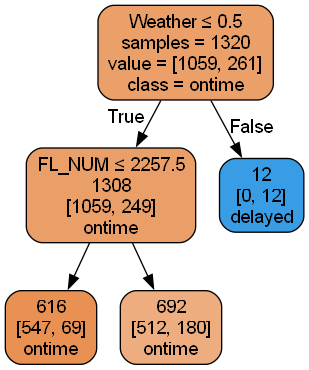

In [35]:
#Plotting decision tree for visualization.
plotDecisionTree(classifier, feature_names=X.columns, class_names=['ontime', 'delayed'])  

# or can do this 'class_names=classifier.classes_' to get 0 and 1 instead of noncompetitive and competitive 

In [36]:
#see classification tree in an exported pdf file for clarity using graphviz. 
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(classifier, out_file="tree", feature_names= X.columns, class_names=['ontime', 'delayed'], filled=True, rounded=True, special_characters=True )

graph = Source.from_file("tree")
graph.view()

'tree.pdf'

In [37]:
#Get and display decision rules
tree_result_rules = export_text(classifier, feature_names=X.columns, class_names=['ontime', 'delayed'] )
print("Decision Rules:", tree_result_rules)

Decision Rules: |--- Weather <= 0.50
|   |--- FL_NUM <= 2257.50
|   |   |--- class: ontime
|   |--- FL_NUM >  2257.50
|   |   |--- class: ontime
|--- Weather >  0.50
|   |--- class: delayed



In [8]:
#Answer 1.
# Write down the results in terms of rules

#If Weather is <= 0.5 and FL_NUM is <= 2257.5 then the classification is ontime 

#If FL_NUM is > 2257.5 then the classification is ontime 

#If Weather is > 0.5 then the classification is delayed

In [40]:
# Check feature importance based on relevance to target data and model performance. 

feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

Weather                0.521623
FL_NUM                 0.478377
CRS_DEP_TIME           0.000000
CARRIER_DL             0.000000
ORIGIN_DCA             0.000000
DEST_LGA               0.000000
DEST_JFK               0.000000
CARRIER_US             0.000000
CARRIER_UA             0.000000
CARRIER_RU             0.000000
CARRIER_OH             0.000000
CARRIER_MQ             0.000000
CARRIER_DH             0.000000
DISTANCE               0.000000
DAY_WEEK_7             0.000000
DAY_WEEK_6             0.000000
DAY_WEEK_5             0.000000
DAY_WEEK_4             0.000000
DAY_WEEK_3             0.000000
DAY_WEEK_2             0.000000
CRS_DEP_TIME_BINNED    0.000000
ORIGIN_IAD             0.000000
dtype: float64


In [10]:
#Answer 2.
# You would be able to use this tree if you needed to fly between DCA and EWR on a Monday at 7 am. Here, you'd need DEST, ORIGIN, DISTANCE, WEATHER, CARRIER, CRS_DEP_TIME_BINNED. This information is typically available in practice ahead of the flight. Information that may be redundant would be FL_NUM and DAY_WEEK. FL_NUM are usually arbitrary identifiers and DAY_WEEK may not be useful if there already exists the scheduled departure time in comparing relevance to prediction.

In [35]:
#Drop Weather column. 
X_train_no_weather = X_train.drop(columns=['Weather'])
X_validation_no_weather = X_validation.drop(columns=['Weather'])

In [44]:
X_train_no_weather

,CRS_DEP_TIME,DISTANCE,FL_NUM,CRS_DEP_TIME_BINNED,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,...,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_JFK,DEST_LGA,ORIGIN_DCA,ORIGIN_IAD
1215,2120,229,7684,7,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1476,700,214,2160,0,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1897,900,214,2164,1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
83,1300,214,2172,3,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
1172,1455,213,746,4,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1830,213,4784,6,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
905,700,169,2703,0,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1096,730,214,1742,0,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False
235,1645,228,7810,5,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [46]:
#Create Classification Tree without weather
classifier_no_weather = DecisionTreeClassifier(random_state=1, max_depth=8, min_impurity_decrease= 0.01)
classifier_no_weather.fit(X_train_no_weather, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=1)

In [50]:
small_tree_rules_no_weather = export_text(classifier_no_weather, feature_names=X_train_no_weather.columns.tolist())
print("Small Tree Rules No Weather:")
print(small_tree_rules_no_weather)

Small Tree Rules No Weather:
|--- FL_NUM <= 2257.50
|   |--- class: 0
|--- FL_NUM >  2257.50
|   |--- class: 0



In [51]:
#Build full tree without constraints

full_tree_classifier_no_weather = DecisionTreeClassifier(random_state=1)
full_tree_classifier_no_weather.fit(X_train_no_weather, y_train)

DecisionTreeClassifier(random_state=1)

In [52]:
full_tree_rules_no_weather = export_text(full_tree_classifier_no_weather, feature_names=X_train_no_weather.columns.tolist())
print("Full Tree Rules No Weather:")
print(full_tree_rules_no_weather)

Full Tree Rules No Weather:
|--- FL_NUM <= 2257.50
|   |--- FL_NUM <= 831.00
|   |   |--- CRS_DEP_TIME <= 1377.50
|   |   |   |--- DAY_WEEK_5 <= 0.50
|   |   |   |   |--- DAY_WEEK_2 <= 0.50
|   |   |   |   |   |--- CRS_DEP_TIME <= 1017.50
|   |   |   |   |   |   |--- DAY_WEEK_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DAY_WEEK_4 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CRS_DEP_TIME >  1017.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- DAY_WEEK_2 >  0.50
|   |   |   |   |   |--- CRS_DEP_TIME_BINNED <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CRS_DEP_TIME_BINNED >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- DAY_WEEK_5 >  0.50
|   |   |   |   |--- CRS_DEP_TIME <= 1017.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CRS_DEP_TIME >  1017.50
|   |   |   |   |   |--- class: 0
|   |   |--- CRS_DEP_TIME >  1377.50
|   |   |   |--- DAY_WEEK_4 <= 0.50
|   |

In [53]:
# Check feature importance based on relevance to target data and model performance. 

feature_importances_full_tree_no_weather = pd.Series(full_tree_classifier_no_weather.feature_importances_, index=X_train_no_weather.columns)
print(feature_importances_full_tree_no_weather.sort_values(ascending=False))

FL_NUM                 0.287618
CRS_DEP_TIME           0.153376
DAY_WEEK_2             0.076079
DAY_WEEK_5             0.075484
DAY_WEEK_4             0.065320
DAY_WEEK_3             0.063729
CRS_DEP_TIME_BINNED    0.056694
DAY_WEEK_6             0.050206
DAY_WEEK_7             0.044147
DISTANCE               0.037694
ORIGIN_IAD             0.016910
DEST_LGA               0.016825
CARRIER_DH             0.011512
DEST_JFK               0.010853
CARRIER_DL             0.008780
CARRIER_MQ             0.008151
CARRIER_RU             0.007235
ORIGIN_DCA             0.007031
CARRIER_US             0.002032
CARRIER_OH             0.000325
CARRIER_UA             0.000000
dtype: float64


In [6]:
# Count instances of each class in 'Flight Status'. There's more data for 'ontime' class than 'delayed' class. 
class_counts = flight_data['Flight Status'].value_counts()
print(class_counts)

Flight Status
ontime     1773
delayed     428
Name: count, dtype: int64


In [9]:
#Answer 3.
#a. The small tree classifier has a single terminal node. If the majority of flights in the training set are 'ontime', then the tree will always predict 'ontime'. Similarly, if the majority of flights are 'delayed', then the tree will always predict 'delayed'.

#b. This is the same as/ equivalent to assigning flights either 'ontime' or 'delayed' without considering any predictors. 

#c. The top three predictors in the full tree are FL_NUM, CRS_DEP_TIME, and DAY_WEEK_2.

#d. The small tree has a single node because none of the predictors remaining are helpful enough to predict the target class after excluding the Weather predictor.

#e. The disadvantage of using top levels of the full tree is it can capture noise in the data and have challenges in prediction accuracy from the added complexity.

#f. logistic regression tends to do well in linear relationships. A classification tree may see challenges if the predictors it has are not relevant enough/strong enough to support predicting the target. It will also struggle if there are limited data in that our scenario is just the data from one month's time in the year. Lastly, if the data is skewed toward having more of one class in the target variable then the tree will have a tougher time finding patterns to predict for the other class. 